# Hotel Booking

Этот набор данных содержит 119390 наблюдений для City Hotel и Resort Hotel. Каждое наблюдение представляет собой бронирование отеля в период с 1 июля 2015 года по 31 августа 2017 года, включая бронирование, которое действительно прибыло, и бронирование, которое было отменено.

**Подключаем библиотеки**

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

## 1. Чтение и разбор данных

In [2]:
data = pd.read_csv('hotel_booking.csv', sep=',', header=0,  engine='python')

In [3]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


**Получаем набор признаков столбцов**

In [4]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

**Набор признаков содержит имена:**
* hotel: вид отеля
* is_canceled: значение, указывающее, было ли бронирование отменено
* lead_time: количество дней, проведенных в отеле
* arrival_date_year: год прибытия
* arrival_date_month: месяц прибытия
* arrival_date_week_number: неделя прибытия
* arrival_date_day_of_month: день прибытия
* stays_in_weekend_nights: кол-во ночей в выходные
* stays_in_week_nights: кол-во ночей в неделю
* adults: число взрослых людей
* children: число детей
* babies: число младенцев
* meal: вид питания
* country: страна
* market_segment: сегмент рынка
* distribution_channel: канал распространения бронирования
* is_repeated_guest: значение, указывающее, было ли бронирование от повторного гостя или нет
* previous_cancellations: кол-во предыдущих бронирований, которые были отменены клиентом до текущего бронирования
* previous_bookings_not_canceled: кол-во предыдущих бронирований, которые не были отменены клиентом до текущего бронирования
* reserved_room_type: код типа номера зарезервирован
* assigned_room_type: код для типа номера, назначенного для бронирования
* booking_changes: количество изменений
* deposit_type:  индикация того, внес ли клиент залог для гарантии бронирования
* agent: ID туристического агентства, сделавшего бронирование
* days_in_waiting_list: кол-во дней, в течение которых бронирование находилось в листе ожидания, прежде чем оно было подтверждено клиенту
* customer_type: тип бронирования
* adr: средняя дневная ставка
* required_car_parking_spaces: кол-во машиномест, требуемых заказчиком
* total_of_special_requests: количество особых запросов, сделанных клиентом
* reservation_status: статус последнего бронирования
* reservation_status_date: дата, когда был установле последний статус
* name: имя (не настоящее)
* email: эл.почта (не настоящая)
* phone-number: номер телефона (не настоящий)
* credit_card: кредитная карта (не настоящая)

*Требуется предсказать бинарный категориальный признак is_canceled по остальным признакам.*

In [5]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

*Преобразуем тип object на специальный, созданный для хранения категориальных значений:*

In [6]:
data['hotel'] = data['hotel'].astype('category');
data['arrival_date_month'] = data['arrival_date_month'].astype('category')
data['meal'] = data['meal'].astype('category')
data['country'] = data['country'].astype('category')
data['market_segment'] = data['market_segment'].astype('category')
data['distribution_channel'] = data['distribution_channel'].astype('category')
data['reserved_room_type'] = data['reserved_room_type'].astype('category')
data['assigned_room_type'] = data['assigned_room_type'].astype('category')
data['deposit_type'] = data['deposit_type'].astype('category')
data['customer_type'] = data['customer_type'].astype('category')
data['reservation_status'] = data['reservation_status'].astype('category')
data['name'] = data['name'].astype('category')
data['email'] = data['email'].astype('category')
data['phone-number'] = data['phone-number'].astype('category')
data['credit_card'] = data['credit_card'].astype('category')

In [7]:
data.dtypes

hotel                             category
is_canceled                          int64
lead_time                            int64
arrival_date_year                    int64
arrival_date_month                category
arrival_date_week_number             int64
arrival_date_day_of_month            int64
stays_in_weekend_nights              int64
stays_in_week_nights                 int64
adults                               int64
children                           float64
babies                               int64
meal                              category
country                           category
market_segment                    category
distribution_channel              category
is_repeated_guest                    int64
previous_cancellations               int64
previous_bookings_not_canceled       int64
reserved_room_type                category
assigned_room_type                category
booking_changes                      int64
deposit_type                      category
agent      

## 2. Визуализация данных и вычисления значений

In [8]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Диаграммы зависимостей признаков друг от друга:

* зависимость бронирования

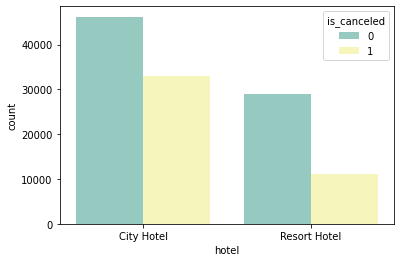

In [9]:
sns.countplot(x='hotel', hue= 'is_canceled', data=data, palette='Set3')
pass

* зависимость бронирования и отмены

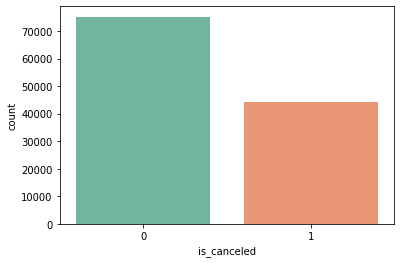

In [10]:
sns.countplot(x='is_canceled', order=data['is_canceled'].value_counts().index,  data=data, palette = 'Set2')
pass

* число бронирований в год

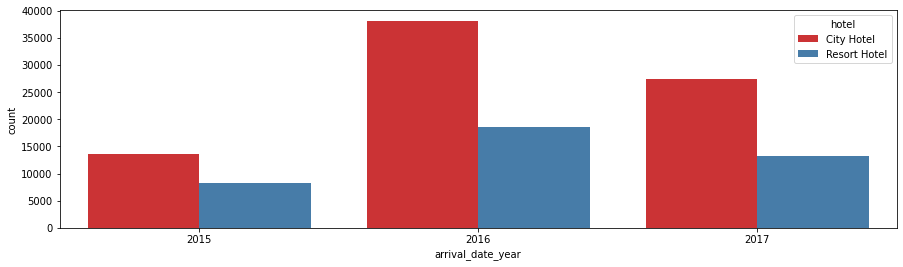

In [11]:
plt.figure(figsize=(15, 4))
sns.countplot(x='arrival_date_year', hue= 'hotel', data=data, palette='Set1')
pass

* число бронирований в месяц

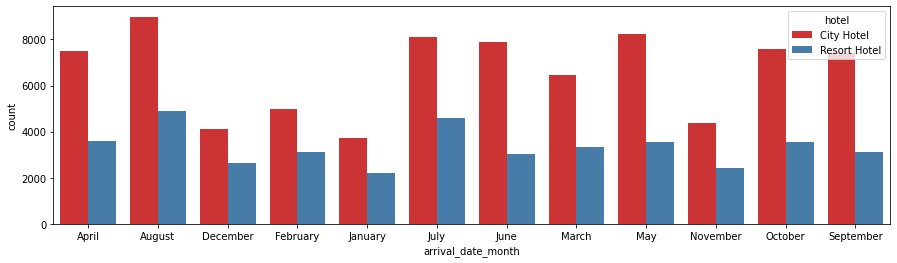

In [12]:
plt.figure(figsize=(15, 4))
sns.countplot(x='arrival_date_month', hue= 'hotel', data=data, palette='Set1')
pass

**Матрица корреляции**

In [13]:
data.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


**Матрица корреляции в удобном для восприятия виде**

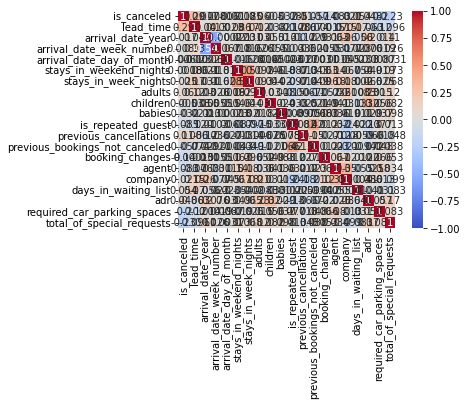

In [14]:
sns.heatmap(data.corr(), annot = True, square=True, vmin=-1, vmax=1,cmap='coolwarm')
pass

*Чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции. По изображению можно сказать, что нет сильно коррелирующих признаков.*

## 3. Обработка пропущенных значений

In [15]:
data.shape

(119390, 36)

In [16]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

*В столбце company можем зметить, что пропущены практически все значения, уберем его:*

In [17]:
data=data.drop(data.columns[[24]], axis='columns')

In [18]:
data.shape

(119390, 35)

In [19]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)

C:\Users\guryl\AppData\Local\Temp/ipykernel_12436/269900637.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.median(axis = 0), axis=0 , inplace=True)


In [20]:
data['country'].fillna(data['country'].mode().iloc[0], inplace=True)

**Пропущенных значений не осталось**

In [21]:
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [22]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,76.744392,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,105.904658,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


In [23]:
data.describe(include=['category'])

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Robert Smith,Michael.C@gmail.com,100-009-1307,************3627
freq,79330,13877,92310,49078,56477,97870,85994,74053,104641,89613,75166,48,6,1,28


## 4. Векторизация признаков

*Проведем векторизацию категориальных признаков:*

In [24]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'category']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'category']
print('categorical_columns=', categorical_columns)
print('numerical_columns=', numerical_columns)

categorical_columns= ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'name', 'email', 'phone-number', 'credit_card']
numerical_columns= ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status_date']


*Выделим бинарные и небинарные:*

In [25]:
data_describe = data.describe(include=['category'])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print('binary_columns=', binary_columns)
print('nonbinary_columns=', nonbinary_columns)

binary_columns= ['hotel']
nonbinary_columns= ['arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'name', 'email', 'phone-number', 'credit_card']


*К небинарными признакам применим метод векторизации.
Бинарным столбцам дадим значения 0 или 1, которые соответсвуют определенным значениям наших данных*

In [26]:
data['arrival_date_month'].unique()

['July', 'August', 'September', 'October', 'November', ..., 'February', 'March', 'April', 'May', 'June']
Length: 12
Categories (12, object): ['April', 'August', 'December', 'February', ..., 'May', 'November', 'October', 'September']

In [27]:
data[nonbinary_columns]

,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
0,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


## 5. Нормализация признаков

*Большинство алгоритмов машинного обучения уязвимы к масштабированию данных. В таком случае количественные признаки необходимо нормализовать.*

In [28]:
numerical_columns_exept_is_canceled = ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']

In [29]:
data_numerical_exept_is_canceled = data[numerical_columns_exept_is_canceled]
data_numerical_exept_is_canceled.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,76.744392,101.831122,0.062518,0.571363
std,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,105.904658,50.535790,0.245291,0.792798
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-6.380000,0.000000,0.000000
25%,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,69.290000,0.000000,0.000000
50%,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,94.575000,0.000000,0.000000
75%,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,126.000000,0.000000,1.000000
max,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,5400.000000,8.000000,5.000000


*Каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:*

In [30]:
data_numerical_exept_is_canceled = (data_numerical_exept_is_canceled - data_numerical_exept_is_canceled.mean(axis = 0))/data_numerical_exept_is_canceled.std(axis = 0)

In [31]:
data_numerical_exept_is_canceled.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,adr,required_car_parking_spaces,total_of_special_requests
count,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05
mean,3.618477e-17,-8.429909e-14,-1.847328e-16,6.094277e-17,-1.225997e-17,4.427873e-17,-5.522939e-17,2.571023e-17,-1.356929e-17,4.570708e-17,3.332808e-18,2.571023e-17,-2.380577e-17,-1.523569e-17,2.818603e-16,-3.142362e-17,-4.951600e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.733146e-01,-1.634761e+00,-1.923183e+00,-1.685290e+00,-9.288865e-01,-1.310234e+00,-3.204779e+00,-2.606575e-01,-8.157892e-02,-1.815596e-01,-1.031791e-01,-9.155438e-02,-3.389884e-01,-7.152130e-01,-2.141277e+00,-2.548718e-01,-7.206911e-01
25%,-8.048748e-01,-2.212855e-01,-8.206585e-01,-8.880985e-01,-9.288865e-01,-7.862039e-01,2.478962e-01,-2.606575e-01,-8.157892e-02,-1.815596e-01,-1.031791e-01,-9.155438e-02,-3.389884e-01,-6.396734e-01,-6.439223e-01,-2.548718e-01,-7.206911e-01
50%,-3.276287e-01,-2.212855e-01,6.136116e-02,2.297721e-02,7.250190e-02,-2.621733e-01,2.478962e-01,-2.606575e-01,-8.157892e-02,-1.815596e-01,-1.031791e-01,-9.155438e-02,-3.389884e-01,-5.924611e-01,-1.435838e-01,-2.548718e-01,-7.206911e-01
75%,5.239281e-01,1.192190e+00,7.963776e-01,8.201684e-01,1.073890e+00,2.618573e-01,2.478962e-01,-2.606575e-01,-8.157892e-02,-1.815596e-01,-1.031791e-01,-9.155438e-02,-3.389884e-01,7.105977e-01,4.782527e-01,-2.548718e-01,5.406636e-01
max,5.923360e+00,1.192190e+00,1.898902e+00,1.731244e+00,1.809749e+01,2.489129e+01,9.174379e+01,2.482997e+01,1.025497e+02,5.507786e+00,3.069024e+01,4.799061e+01,3.185451e+01,4.327058e+00,1.048399e+02,3.235943e+01,5.586082e+00


*Далее соединим все в одну таблицу:*

In [32]:
data = pd.concat((data['is_canceled'], data_numerical_exept_is_canceled), axis = 1)
print(data.shape)

(119390, 18)


In [33]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05
mean,0.370416,3.618477e-17,-8.429909e-14,-1.847328e-16,6.094277e-17,-1.225997e-17,4.427873e-17,-5.522939e-17,2.571023e-17,-1.356929e-17,4.570708e-17,3.332808e-18,2.571023e-17,-2.380577e-17,-1.523569e-17,2.818603e-16,-3.142362e-17,-4.951600e-17
std,0.482918,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000,-9.733146e-01,-1.634761e+00,-1.923183e+00,-1.685290e+00,-9.288865e-01,-1.310234e+00,-3.204779e+00,-2.606575e-01,-8.157892e-02,-1.815596e-01,-1.031791e-01,-9.155438e-02,-3.389884e-01,-7.152130e-01,-2.141277e+00,-2.548718e-01,-7.206911e-01
25%,0.000000,-8.048748e-01,-2.212855e-01,-8.206585e-01,-8.880985e-01,-9.288865e-01,-7.862039e-01,2.478962e-01,-2.606575e-01,-8.157892e-02,-1.815596e-01,-1.031791e-01,-9.155438e-02,-3.389884e-01,-6.396734e-01,-6.439223e-01,-2.548718e-01,-7.206911e-01
50%,0.000000,-3.276287e-01,-2.212855e-01,6.136116e-02,2.297721e-02,7.250190e-02,-2.621733e-01,2.478962e-01,-2.606575e-01,-8.157892e-02,-1.815596e-01,-1.031791e-01,-9.155438e-02,-3.389884e-01,-5.924611e-01,-1.435838e-01,-2.548718e-01,-7.206911e-01
75%,1.000000,5.239281e-01,1.192190e+00,7.963776e-01,8.201684e-01,1.073890e+00,2.618573e-01,2.478962e-01,-2.606575e-01,-8.157892e-02,-1.815596e-01,-1.031791e-01,-9.155438e-02,-3.389884e-01,7.105977e-01,4.782527e-01,-2.548718e-01,5.406636e-01
max,1.000000,5.923360e+00,1.192190e+00,1.898902e+00,1.731244e+00,1.809749e+01,2.489129e+01,9.174379e+01,2.482997e+01,1.025497e+02,5.507786e+00,3.069024e+01,4.799061e+01,3.185451e+01,4.327058e+00,1.048399e+02,3.235943e+01,5.586082e+00


## 6. Тестовая и обучающая выборка

In [34]:
data

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,adr,required_car_parking_spaces,total_of_special_requests
0,0,2.227042,-1.634761,-0.012140,-1.685290,-0.928887,-1.310234,0.247896,-0.260658,-0.081579,-0.18156,-0.103179,-0.091554,4.260083,-0.592461,-2.015030,-0.254872,-0.720691
1,0,5.923360,-1.634761,-0.012140,-1.685290,-0.928887,-1.310234,0.247896,-0.260658,-0.081579,-0.18156,-0.103179,-0.091554,5.793107,-0.592461,-2.015030,-0.254872,-0.720691
2,0,-0.907810,-1.634761,-0.012140,-1.685290,-0.928887,-0.786204,-1.478441,-0.260658,-0.081579,-0.18156,-0.103179,-0.091554,-0.338988,-0.592461,-0.530933,-0.254872,-0.720691
3,0,-0.851664,-1.634761,-0.012140,-1.685290,-0.928887,-0.786204,-1.478441,-0.260658,-0.081579,-0.18156,-0.103179,-0.091554,-0.338988,2.145851,-0.530933,-0.254872,-0.720691
4,0,-0.842306,-1.634761,-0.012140,-1.685290,-0.928887,-0.262173,0.247896,-0.260658,-0.081579,-0.18156,-0.103179,-0.091554,-0.338988,1.541534,-0.075810,-0.254872,0.540664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,-0.758086,1.192190,0.575873,1.617360,1.073890,1.309918,0.247896,-0.260658,-0.081579,-0.18156,-0.103179,-0.091554,-0.338988,2.995672,-0.112616,-0.254872,-0.720691
119386,0,-0.018822,1.192190,0.575873,1.731244,1.073890,1.309918,1.974234,-0.260658,-0.081579,-0.18156,-0.103179,-0.091554,-0.338988,-0.639673,2.445769,-0.254872,1.802018
119387,0,-0.655151,1.192190,0.575873,1.731244,1.073890,1.309918,0.247896,-0.260658,-0.081579,-0.18156,-0.103179,-0.091554,-0.338988,-0.639673,1.105729,-0.254872,4.324728
119388,0,0.046682,1.192190,0.575873,1.731244,1.073890,1.309918,0.247896,-0.260658,-0.081579,-0.18156,-0.103179,-0.091554,-0.338988,0.115723,0.050833,-0.254872,-0.720691


In [35]:
x = data.drop('is_canceled', axis = 1)
y = data['is_canceled']
feature_names = x.columns

In [36]:
type(feature_names)

pandas.core.indexes.base.Index

In [37]:
x = x.to_numpy()

In [38]:
y = y.to_numpy()

In [39]:
print(x.shape)
print(y.shape)
N, d = x.shape

(119390, 17)
(119390,)


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print('Количество обучающих данных: ' + str(N_train) + ' | '+' тестовых данных: ' + str(N_test))

Количество обучающих данных: 89542 |  тестовых данных: 29848


# Домашняя работа №2

## Обучение классификатора

*Возьмем скрытый слой со кол-во нейронов равным 100:*

In [41]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,),
                          solver = 'adam', 
                          activation = 'relu',
                          max_iter=1000,
                          random_state = 30)

In [42]:
%%time
mlp_model.fit(X_train, y_train)

Wall time: 1min 57s


MLPClassifier(max_iter=1000, random_state=30)

In [43]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [44]:
np.mean(y_test)

0.37282229965156793

In [45]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.18937481852091756 0.19693111766282498


In [48]:
print("TRAIN: {:.2f}% TEST: {:.2f}%".format(accuracy_score(y_train, y_train_pred)
      * 100, accuracy_score(y_test, y_test_pred) * 100))

TRAIN: 81.06% TEST: 80.31%


*Можем увидеть, что точность на тренировочной выборке не сильно отличается от тестовой.Поэтому нельзя сказать, что происходит переобчение.*

## Подбор оптимального значения параметра регуляризации альфа

In [ ]:
from sklearn.metrics import accuracy_score
alpha_arr = np.logspace(-3, 3, 10)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'adam', activation = 'relu', max_iter=1000, random_state = 20)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))